In [1]:
## tutorial to better understand how cross entropy is used as a loss function in ML
## tutorial url:
## https://machinelearningmastery.com/cross-entropy-for-machine-learning/

#### Cross Entropy

Cross-entropy is commonly used in machine learning as a loss function.

Cross-entropy is a measure from the field of information theory, building upon entropy and generally calculating the difference between two probability distributions. It is closely related to but is different from KL divergence that calculates the relative entropy between two probability distributions, whereas cross-entropy can be thought to calculate the total entropy between the distributions.

Cross-entropy is also related to and often confused with logistic loss, called log loss. Although the two measures are derived from a different source, when used as loss functions for classification models, both measures calculate the same quantity and can be used interchangeably.

#### What is Cross Entropy?

Cross-entropy is a measure of the difference between two probability distributions for a given random variable or set of events.

Cross-entropy builds upon the idea of entropy from information theory and calculates the number of bits required to represent or transmit an average event from one distribution compared to another distribution.

"the cross entropy is the average number of bits needed to encode data coming from a source with distribution p when we use model q"

The intuition for this definition comes if we consider a target or underlying probability distribution P and an approximation of the target distribution Q, then the cross-entropy of Q from P is the number of additional bits to represent an event using Q instead of P.

Cross entropy formula: H(P, Q) = – sum x in X P(x) * log(Q(x))

#### Cross Entropy vs KL Divergence

Specifically, the KL divergence measures a very similar quantity to cross-entropy. It measures the average number of extra bits required to represent a message with Q instead of P, not the total number of bits.

Cross-Entropy: Average number of total bits to represent an event from Q instead of P.

Relative Entropy (KL Divergence): Average number of extra bits to represent an event from Q instead of P.

## Calculating Cross Entropy

In [1]:
## Two Discrete Probability Distributions

# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]

P=1.000 Q=1.000


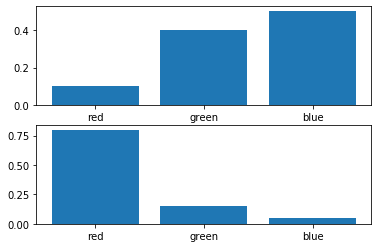

In [3]:
# plot of distributions
from matplotlib import pyplot
# define distributions
events = ['red', 'green', 'blue']
p = [0.10, 0.40, 0.50]
q = [0.80, 0.15, 0.05]
print('P=%.3f Q=%.3f' % (sum(p), sum(q)))
# plot first distribution
pyplot.subplot(2,1,1)
pyplot.bar(events, p)
# plot second distribution
pyplot.subplot(2,1,2)
pyplot.bar(events, q)
# show the plot
pyplot.show()

#### Calculate Cross-Entropy Between Distributions

In [4]:
from math import log2
# calculate cross entropy
def cross_entropy(p, q):
    return -sum([p[i]*log2(q[i]) for i in range(len(p))])

# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)
# calculate cross entropy H(Q, P)
ce_qp = cross_entropy(q, p)
print('H(Q, P): %.3f bits' % ce_qp)

H(P, Q): 3.288 bits
H(Q, P): 2.906 bits


#### Calculate Cross-Entropy Between a Distribution and Itself

If two probability distributions are the same, then the cross-entropy between them will be the entropy of the distribution.

In [5]:
# calculate cross entropy H(P, P)
ce_pp = cross_entropy(p, p)
print('H(P, P): %.3f bits' % ce_pp)
# calculate cross entropy H(Q, Q)
ce_qq = cross_entropy(q, q)
print('H(Q, Q): %.3f bits' % ce_qq)

H(P, P): 1.361 bits
H(Q, Q): 0.884 bits


In [9]:
## confirm the above statement
from scipy.stats import entropy

# calculate entropy
e = entropy(p, base=2)
# print the result
print('H(P, P) entropy: %.3f bits' % e)
# calculate entropy
e = entropy(q, base=2)
# print the result
print('H(Q, Q) entropy: %.3f bits' % e)

H(P, P) entropy: 1.361 bits
H(Q, Q) entropy: 0.884 bits


#### Calculate Cross-Entropy Using KL Divergence

The cross-entropy calculated with KL divergence should be identical, and it may be interesting to calculate the KL divergence between the distributions as well to see the relative entropy or additional bits required instead of the total bits calculated by the cross-entropy.

In [10]:
# calculate the kl divergence KL(P || Q)
def kl_divergence(p, q):
    return sum(p[i] * log2(p[i]/q[i]) for i in range(len(p)))
 
# calculate entropy H(P)
def entropy(p):
    return -sum([p[i] * log2(p[i]) for i in range(len(p))])
 
# calculate cross entropy H(P, Q)
def cross_entropy(p, q):
    return entropy(p) + kl_divergence(p, q)
 
# calculate H(P)
en_p = entropy(p)
print('H(P): %.3f bits' % en_p)
# calculate kl divergence KL(P || Q)
kl_pq = kl_divergence(p, q)
print('KL(P || Q): %.3f bits' % kl_pq)
# calculate cross entropy H(P, Q)
ce_pq = cross_entropy(p, q)
print('H(P, Q): %.3f bits' % ce_pq)

H(P): 1.361 bits
KL(P || Q): 1.927 bits
H(P, Q): 3.288 bits


#### Cross-Entropy as a Loss Function

Cross-entropy is widely used as a loss function when optimizing classification models.

Two examples that you may encounter include the logistic regression algorithm (a linear classification algorithm), and artificial neural networks that can be used for classification tasks.

"using the cross-entropy error function instead of the sum-of-squares for a classification problem leads to faster training as well as improved generalization."

We can see that the idea of cross-entropy may be useful for optimizing a classification model.

Each example has a known class label with a probability of 1.0, and a probability of 0.0 for all other labels. A model can estimate the probability of an example belonging to each class label. Cross-entropy can then be used to calculate the difference between the two probability distributions.

Our model seeks to approximate the target probability distribution Q.

In the language of classification, these are the actual and the predicted probabilities, or y and yhat.

Expected Probability (y): The known probability of each class label for an example in the dataset (P).
Predicted Probability (yhat): The probability of each class label an example predicted by the model (Q).
We can, therefore, estimate the cross-entropy for a single prediction using the cross-entropy calculation described above; for example.

H(P, Q) = – sum x in X P(x) * log(Q(x))

Where each x in X is a class label that could be assigned to the example, and P(x) will be 1 for the known label and 0 for all other labels.

The cross-entropy for a single example in a binary classification task can be stated by unrolling the sum operation as follows:

H(P, Q) = – (P(class0) * log(Q(class0)) + P(class1) * log(Q(class1)))

Pretend with have a classification problem with 3 classes, and we have one example that belongs to each class. We can represent each example as a discrete probability distribution with a 1.0 probability for the class to which the example belongs and a 0.0 probability for all other classes.

We can calculate the entropy of the probability distribution for each “variable” across the “events“.

In [11]:
from numpy import asarray
 
# calculate entropy
def entropy(p):
	return -sum([p[i] * log2(p[i]) for i in range(len(p))])
 
# class 1
p = asarray([1,0,0]) + 1e-15
print(entropy(p))
# class 2
p = asarray([0,1,0]) + 1e-15
print(entropy(p))
# class 3
p = asarray([0,0,1]) + 1e-15
print(entropy(p))

9.805612959471341e-14
9.805612959471341e-14
9.805612959471341e-14


We can see that in each case, the entropy is 0.0 (actually a number very close to zero).

Note that we had to add a very small value to the 0.0 values to avoid the log() from blowing up, as we cannot calculate the log of 0.0.

This means that the cross entropy of two distributions (real and predicted) that have the same probability distribution for a class label, will also always be 0.0.

Recall that when evaluating a model using cross-entropy on a training dataset that we average the cross-entropy across all examples in the dataset.

Therefore, a cross-entropy of 0.0 when training a model indicates that the predicted class probabilities are identical to the probabilities in the training dataset, e.g. zero loss.

We could just as easily minimize the KL divergence as a loss function instead of the cross-entropy.

Recall that the KL divergence is the extra bits required to transmit one variable compared to another. It is the cross-entropy without the entropy of the class label, which we know would be zero anyway.

As such, minimizing the KL divergence and the cross entropy for a classification task are identical.

"Minimizing this KL divergence corresponds exactly to minimizing the cross-entropy between the distributions."

#### Calculate Cross-Entropy Between Class Labels and Probabilities

Consider a two-class classification task with the following 10 actual class labels (P) and predicted class labels (Q).

In [12]:
# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]

We can enumerate these probabilities and calculate the cross-entropy for each using the cross-entropy function developed in the previous section using log() (natural logarithm) instead of log2().

In [13]:
# calculate cross entropy
def cross_entropy(p, q):
	return -sum([p[i]*log(q[i]) for i in range(len(p))])

For each actual and predicted probability, we must convert the prediction into a distribution of probabilities across each event, in this case, the classes {0, 1} as 1 minus the probability for class 0 and probability for class 1.

We can then calculate the cross-entropy and repeat the process for all examples.

Finally, we can calculate the average cross-entropy across the dataset and report it as the cross-entropy loss for the model on the dataset.

In [15]:
from math import log
from numpy import mean

# calculate cross entropy for each example
results = list()
for i in range(len(p)):
	# create the distribution for each event {0, 1}
	expected = [1.0 - p[i], p[i]]
	predicted = [1.0 - q[i], q[i]]
	# calculate cross entropy for the two events
	ce = cross_entropy(expected, predicted)
	print('>[y=%.1f, yhat=%.1f] ce: %.3f nats' % (p[i], q[i], ce))
	results.append(ce)
 
# calculate the average cross entropy
mean_ce = mean(results)
print('Average Cross Entropy: %.3f nats' % mean_ce)

>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.9] ce: 0.105 nats
>[y=1.0, yhat=0.6] ce: 0.511 nats
>[y=1.0, yhat=0.8] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.4] ce: 0.511 nats
>[y=0.0, yhat=0.2] ce: 0.223 nats
>[y=0.0, yhat=0.1] ce: 0.105 nats
>[y=0.0, yhat=0.3] ce: 0.357 nats
Average Cross Entropy: 0.247 nats


This is how cross-entropy loss is calculated when optimizing a logistic regression model or a neural network model under a cross-entropy loss function.

#### Intuition for Cross-Entropy on Predicted Probabilities

We can then calculate the cross entropy for different “predicted” probability distributions transitioning from a perfect match of the target distribution to the exact opposite probability distribution.

We would expect that as the predicted probability distribution diverges further from the target distribution that the cross-entropy calculated will increase.

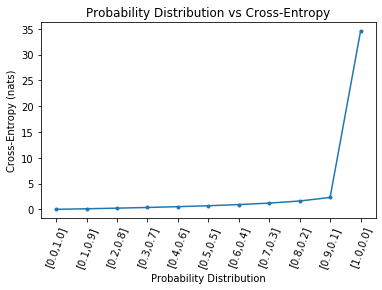

In [22]:
from matplotlib import pyplot
 
# calculate cross-entropy
def cross_entropy(p, q, ets=1e-15):
	return -sum([p[i]*log(q[i]+ets) for i in range(len(p))])
 
# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1, 0.0]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

We are not going to have a model that predicts the exact opposite probability distribution for all cases on a binary classification task.

As such, we can remove this case and re-calculate the plot.

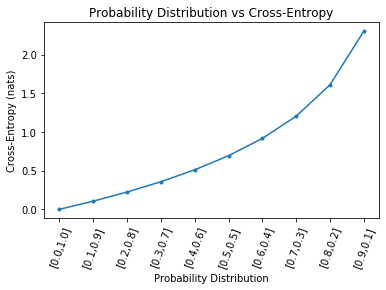

In [23]:
# define the target distribution for two events
target = [0.0, 1.0]
# define probabilities for the first event
probs = [1.0, 0.9, 0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2, 0.1]
# create probability distributions for the two events
dists = [[1.0 - p, p] for p in probs]
# calculate cross-entropy for each distribution
ents = [cross_entropy(target, d) for d in dists]
# plot probability distribution vs cross-entropy
pyplot.plot([1-p for p in probs], ents, marker='.')
pyplot.title('Probability Distribution vs Cross-Entropy')
pyplot.xticks([1-p for p in probs], ['[%.1f,%.1f]'%(d[0],d[1]) for d in dists], rotation=70)
pyplot.subplots_adjust(bottom=0.2)
pyplot.xlabel('Probability Distribution')
pyplot.ylabel('Cross-Entropy (nats)')
pyplot.show()

We can see a super-linear relationship where the more the predicted probability distribution diverges from the target, the larger the increase in cross-entropy.

#### What is a good cross-entropy score?

If you are working in nats (and you usually are) and you are getting mean cross-entropy less than 0.2, you are off to a good start, and less than 0.1 or 0.05 is even better.

On the other hand, if you are getting mean cross-entropy greater than 0.2 or 0.3 you can probably improve, and if you are getting a mean cross-entropy greater than 1.0, then something is going on and you’re making poor probability predictions on many examples in your dataset.

We can summarise these intuitions for the mean cross-entropy as follows:

Cross-Entropy = 0.00: Perfect probabilities.

Cross-Entropy < 0.02: Great probabilities.

Cross-Entropy < 0.05: On the right track.

Cross-Entropy < 0.20: Fine.

Cross-Entropy > 0.30: Not great.

Cross-Entropy > 1.00: Terrible.

Cross-Entropy > 2.00 Something is broken.

#### Log Loss and Cross Entropy Calculate the Same Thing

For classification problems, “log loss“, “cross-entropy” and “negative log-likelihood” are used interchangeably.

More generally, the terms “cross-entropy” and “negative log-likelihood” are used interchangeably in the context of loss functions for classification models.

Calculating the average log loss on the same set of actual and predicted probabilities from the previous section should give the same result as calculating the average cross-entropy.

In [24]:
# calculate log loss for classification problem with scikit-learn
from sklearn.metrics import log_loss
from numpy import asarray
# define classification data
p = [1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
q = [0.8, 0.9, 0.9, 0.6, 0.8, 0.1, 0.4, 0.2, 0.1, 0.3]
# define data as expected, e.g. probability for each event {0, 1}
y_true = asarray([[1-v, v] for v in p])
y_pred = asarray([[1-v, v] for v in q])
# calculate the average log loss
ll = log_loss(y_true, y_pred)
print('Average Log Loss: %.3f' % ll)

Average Log Loss: 0.247


This does not mean that log loss calculates cross-entropy or cross-entropy calculates log loss.

Instead, they are different quantities, arrived at from different fields of study, that under the conditions of calculating a loss function for a classification task, result in an equivalent calculation and result. Specifically, a cross-entropy loss function is equivalent to a maximum likelihood function under a Bernoulli or Multinoulli probability distribution.